In [476]:
import pandas as pd
import numpy as np

In [477]:
import matplotlib.pyplot as plt

In [478]:

from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.datasets import make_regression


In [479]:
from sklearn.preprocessing import PolynomialFeatures

from mlxtend.evaluate import bias_variance_decomp

In [480]:
data_set = load_diabetes()

In [481]:
df = pd.DataFrame(data_set.data,columns=data_set.feature_names)

In [482]:
df['TARGET'] = data_set.target

In [483]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  TARGET  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [485]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [486]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
TARGET    0
dtype: int64

In [487]:
x_train,x_test,y_train,y_test = train_test_split(data_set.data,data_set.target,test_size=0.2,random_state=2)

In [488]:

coefs = []
r2_scores = []

alpha_values = [0, 1, 5, 10, 15, 20, 30, 50, 60, 70, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for alpha in alpha_values:
    reg = Ridge(alpha=alpha)
    reg.fit(x_train, y_train)
    coefs.append(reg.coef_)
    prediction = reg.predict(x_test)
    r2_scores.append(r2_score(y_test, prediction))

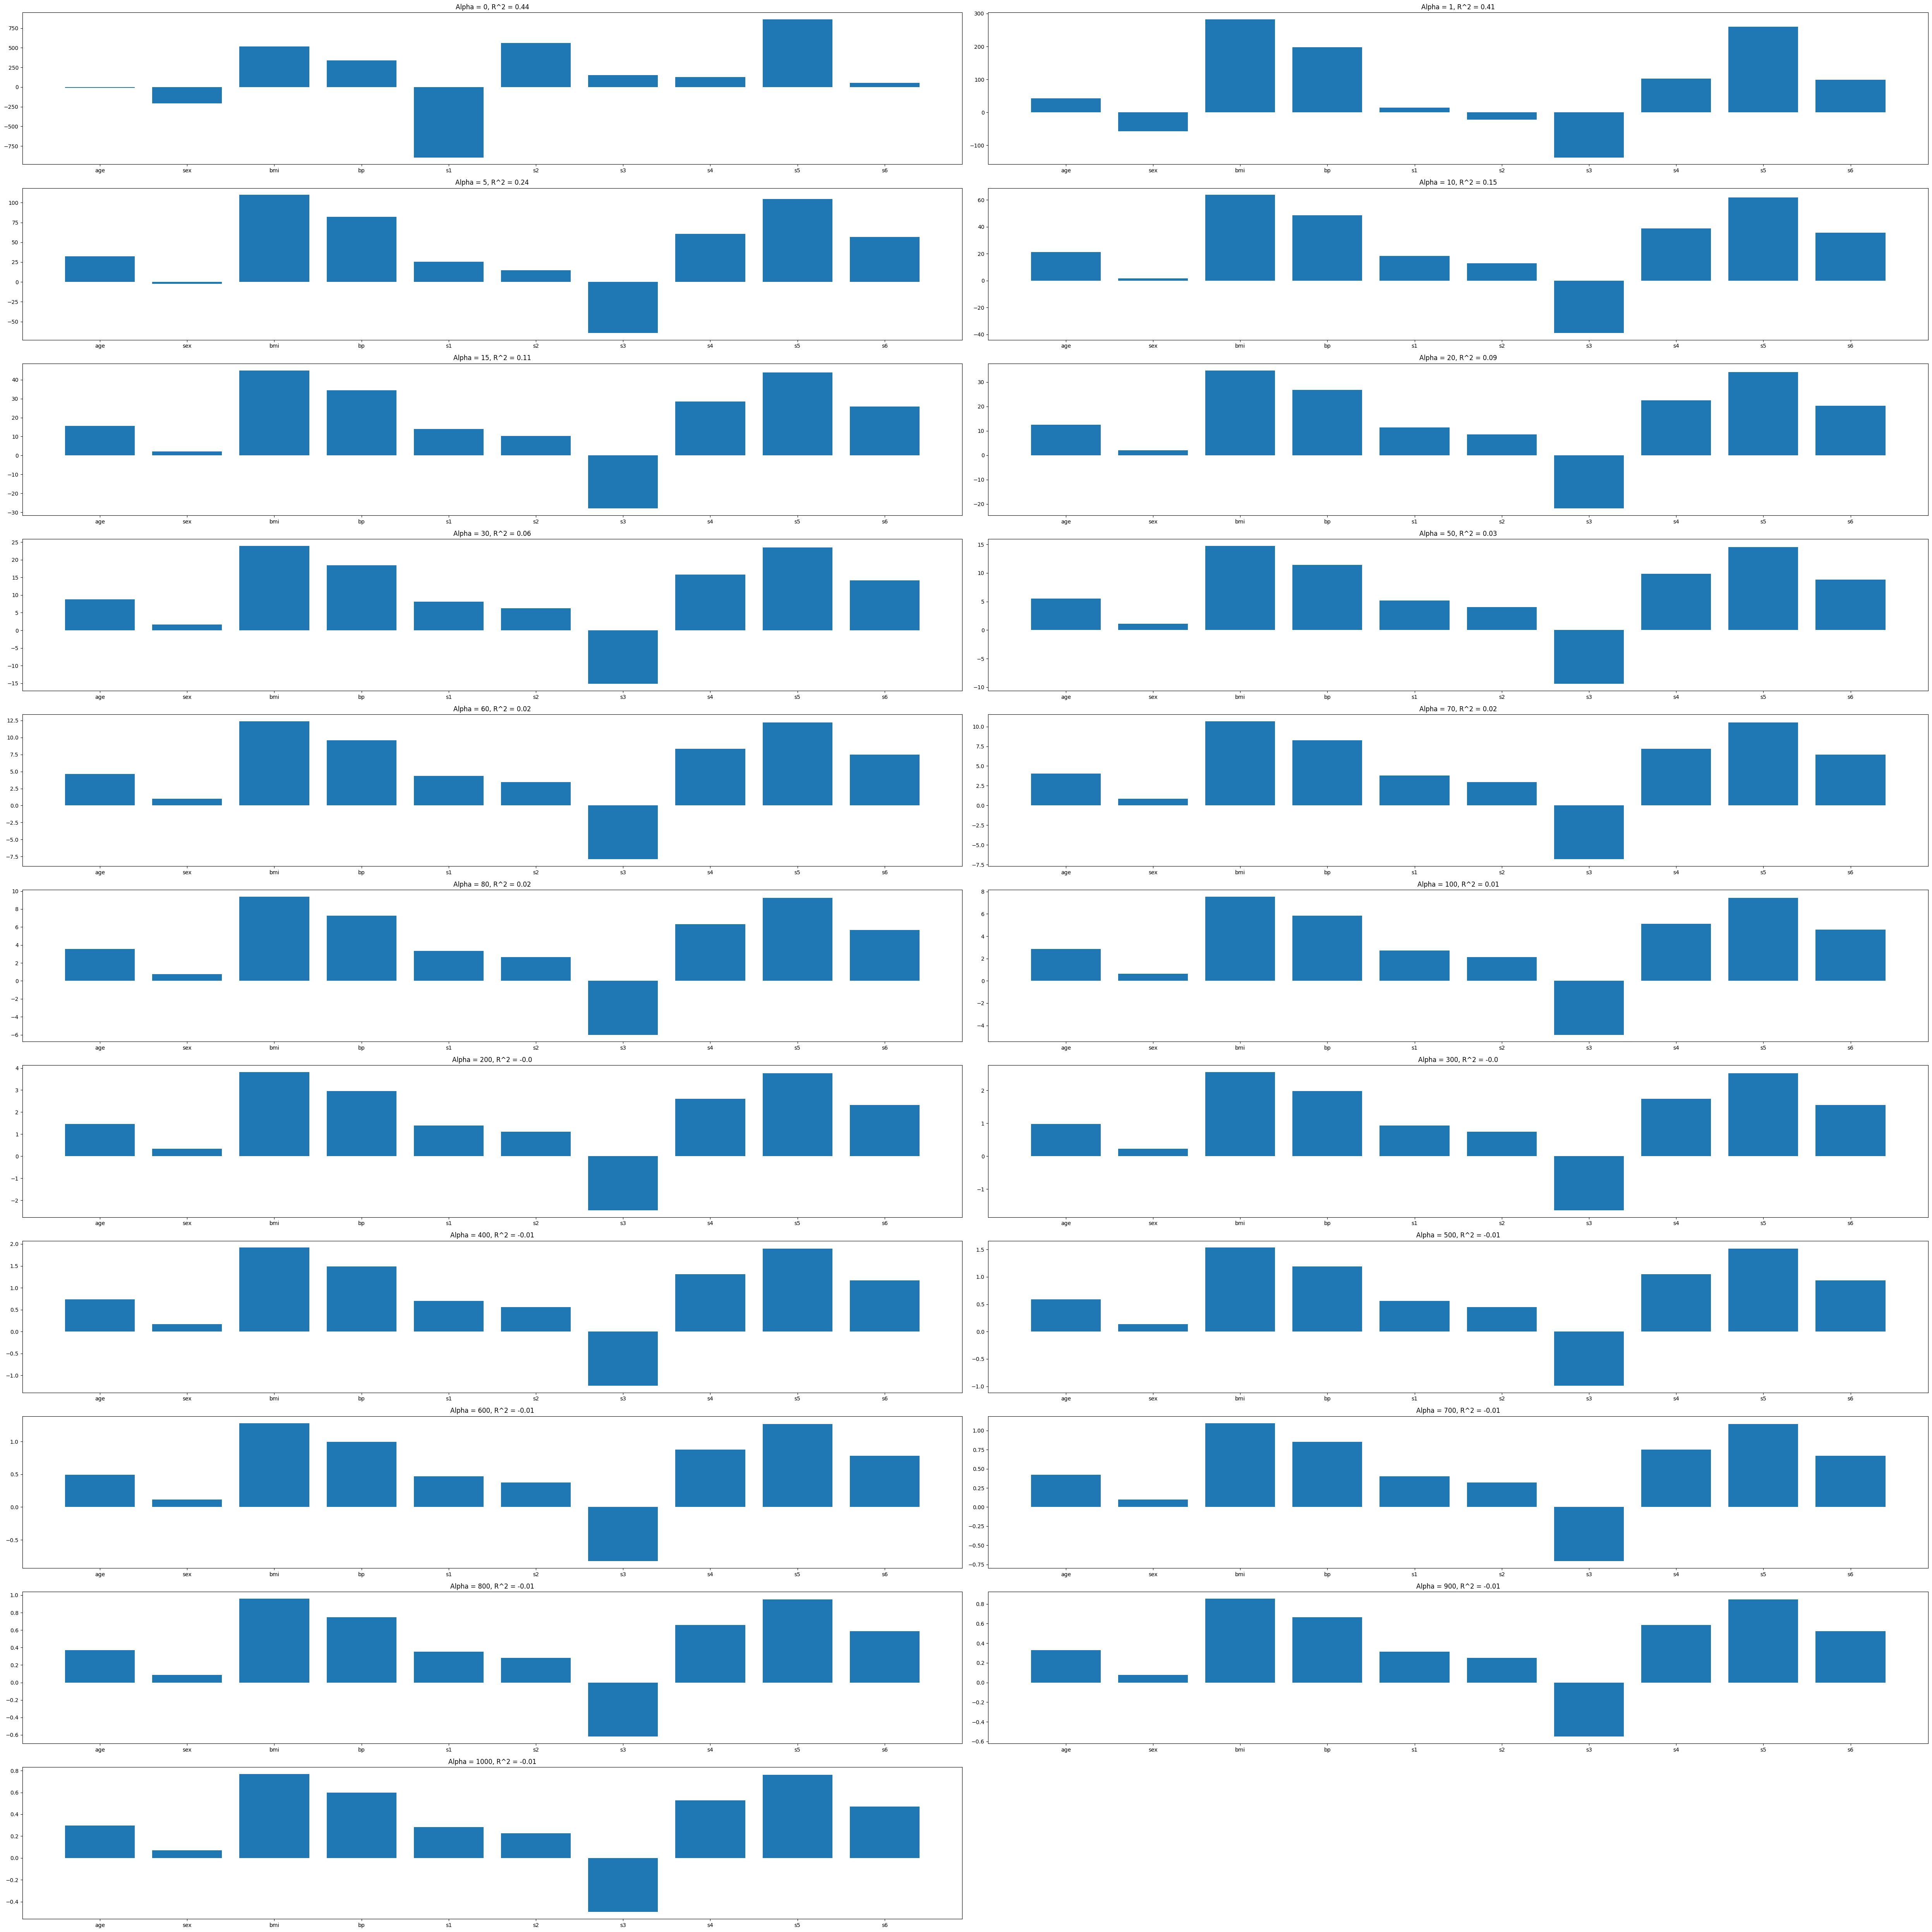

In [489]:
plt.figure(figsize=(50,50))
for i in range(len(alpha_values)):
    plt.subplot(11, 2, i+1)
    plt.bar(data_set.feature_names, coefs[i])
    plt.title(f'Alpha = {alpha_values[i]}, R^2 = {round(r2_scores[i], 2)}')

plt.tight_layout()
plt.show()

In [490]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [491]:

input_array = np.array(coefs)

In [492]:
coef_df = pd.DataFrame(input_array,columns=data_set.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [493]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [494]:
input_array = np.array(coefs).T

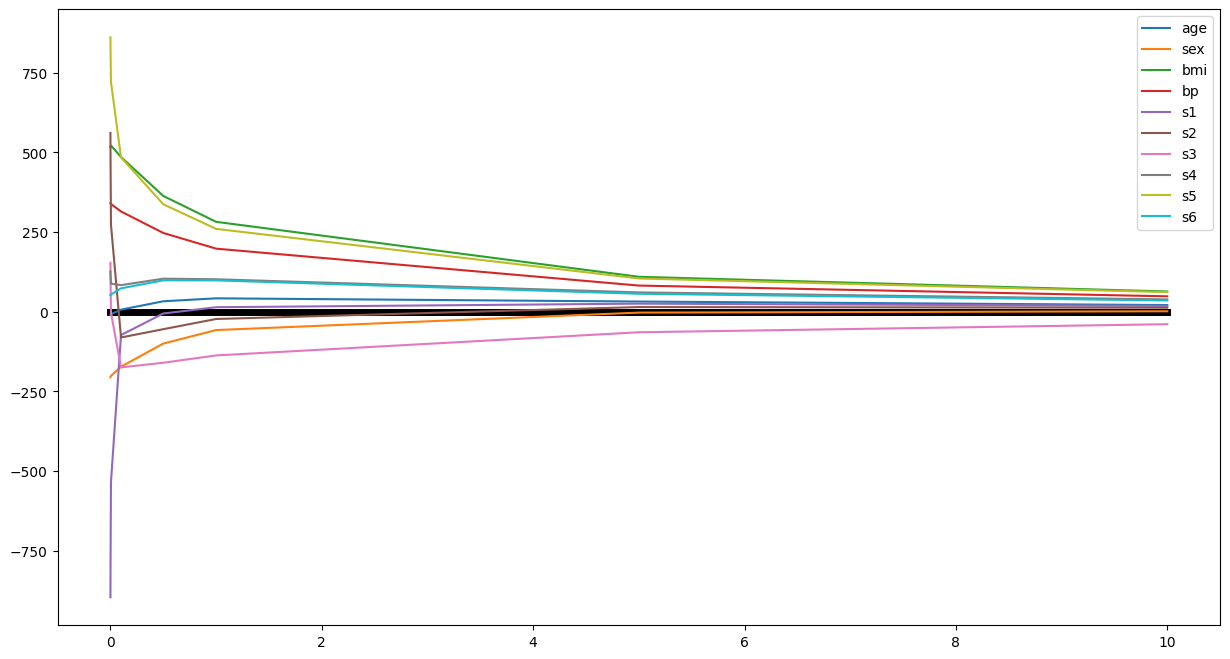

In [495]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data_set.feature_names[i])
plt.legend()

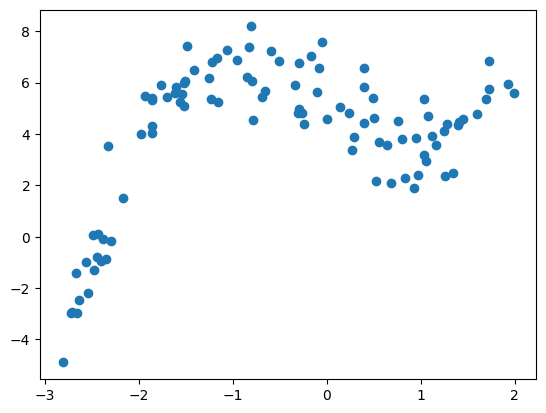

In [496]:

m = 100
x = 5 * np.random.rand(m, 1) - 3
y = 0.7 * x ** 3 - 2 * x + 5 + np.random.randn(m, 1)

plt.scatter(x, y)
plt.show()

In [497]:
x_train,x_test,y_train,y_test = train_test_split(x.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [498]:
poly = PolynomialFeatures(degree=15)

x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

In [499]:
alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, x_train, y_train, x_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

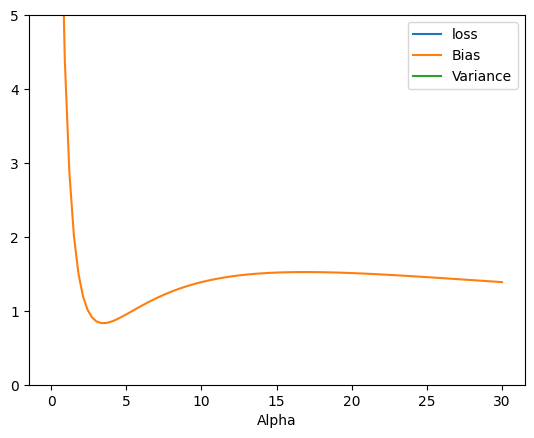

In [500]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

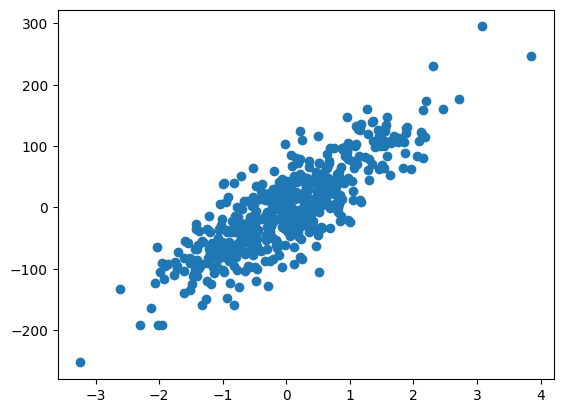

In [501]:
x,y = make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1,noise=40,random_state=42)

plt.scatter(x,y)

In [502]:
reg = LinearRegression()

In [503]:
reg.fit(x,y)

LinearRegression()

In [504]:
reg.intercept_

-1.567061323002805

In [505]:
reg.coef_

array([62.34265467])

In [506]:
def cal_loss(m,alpha):
    return np.sum((y - m*x.ravel() + 2.29)**2) + alpha*m*m

In [507]:

def predict(m):
    return m*x - 2.29

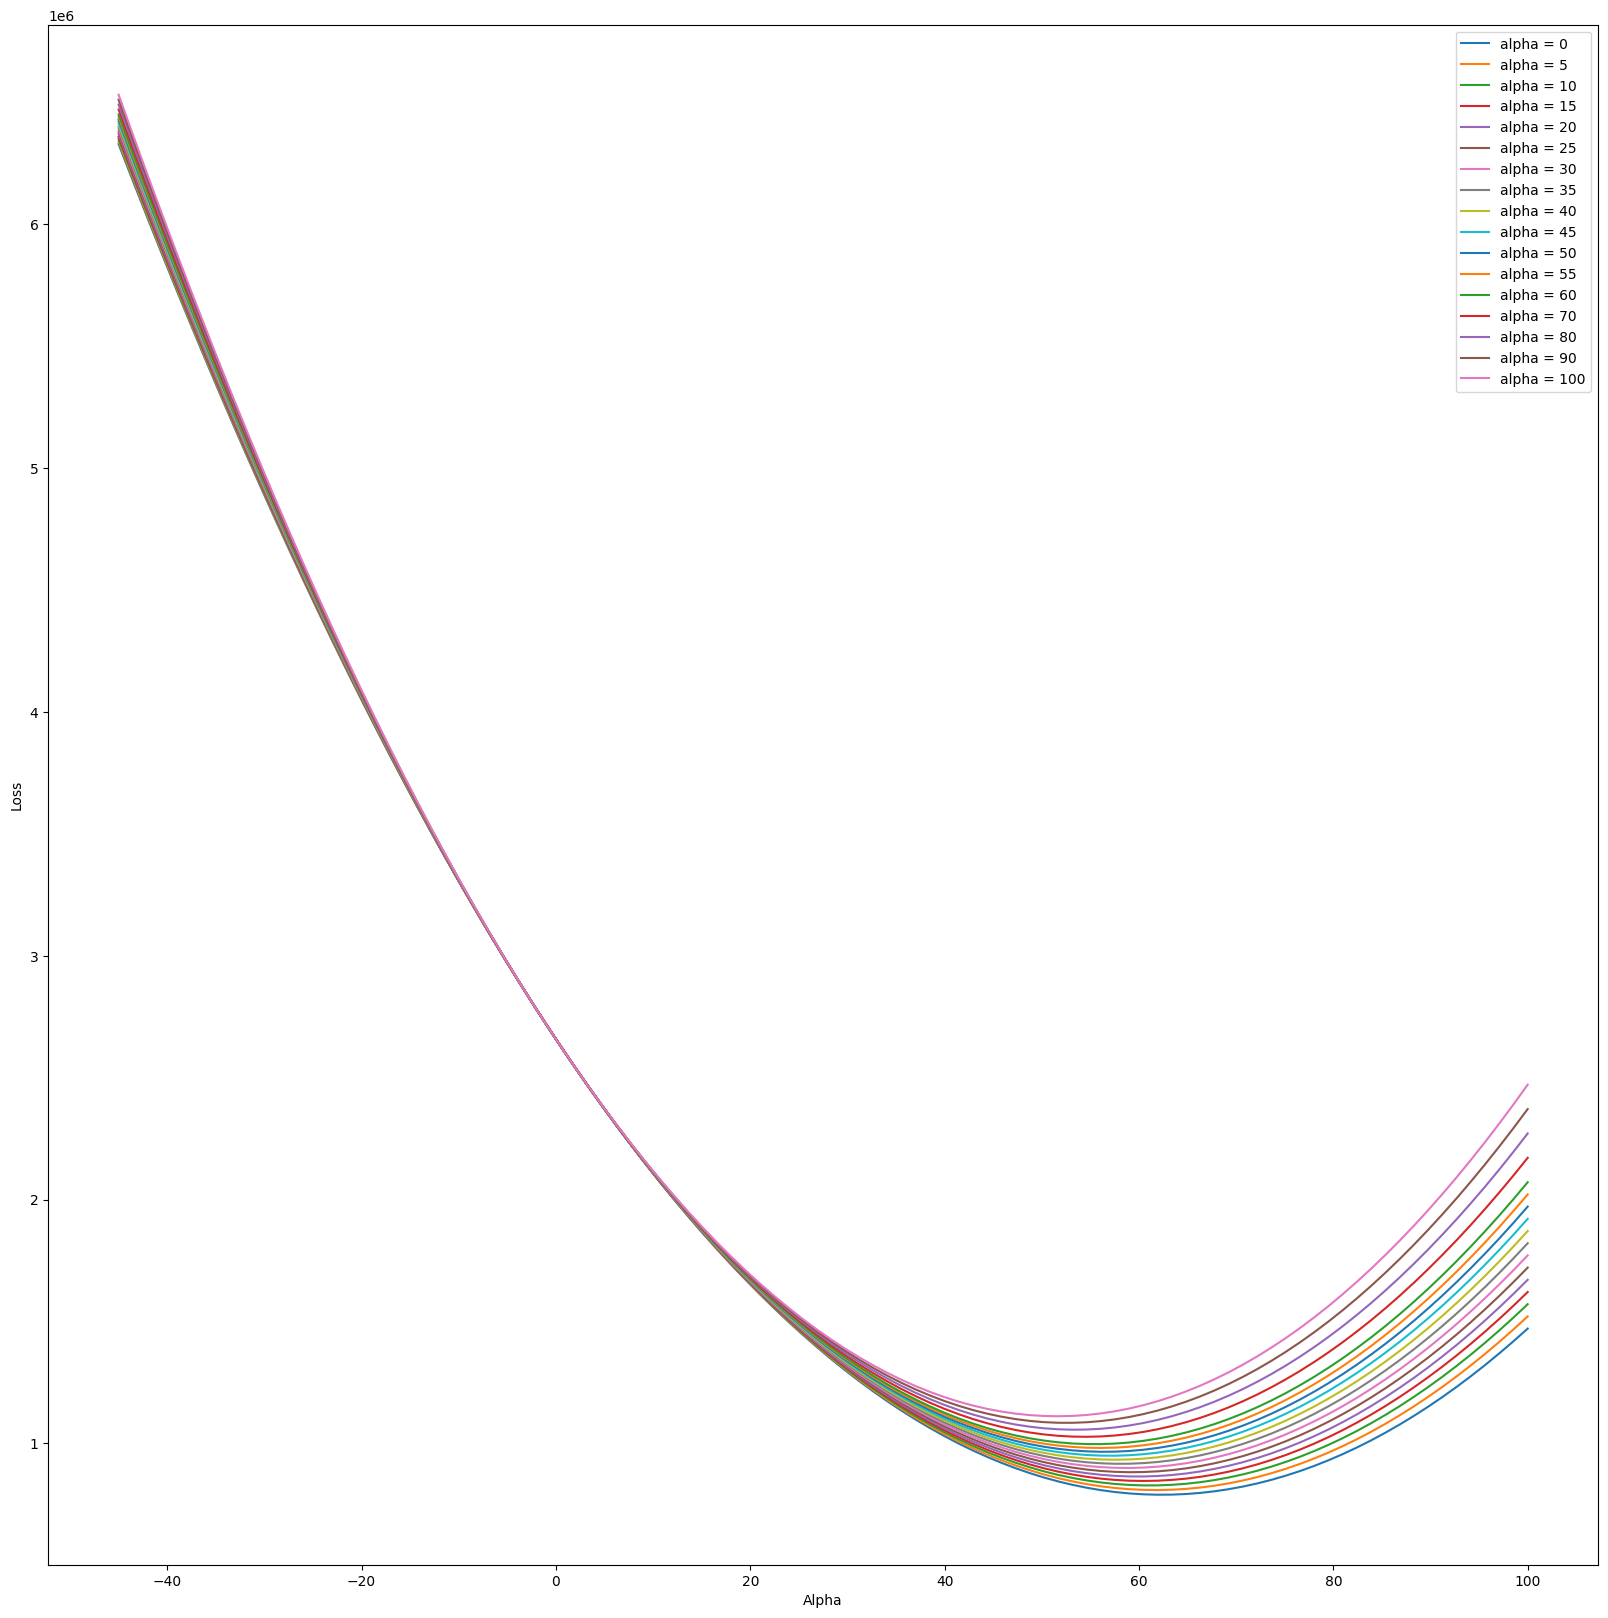

In [508]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(20,20))
for j in [0,5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, 90,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()